In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install folium

### Q1. Spatial Distribution and Hotspots

In [9]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/Internship/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv")

df=df[['Start_Lat','Start_Lng','State','City']]
df=df.dropna()
print("Total Accidents:",len(df))
df.head()

Total Accidents: 7728141


,Start_Lat,Start_Lng,State,City
0,39.865147,-84.058723,OH,Dayton
1,39.928059,-82.831184,OH,Reynoldsburg
2,39.063148,-84.032608,OH,Williamsburg
3,39.747753,-84.205582,OH,Dayton
4,39.627781,-84.188354,OH,Dayton


In [10]:
import folium
from folium.plugins import HeatMap

usa_map=folium.Map(location=[39.5,-98.35],zoom_start=5)

heat_data=df[['Start_Lat','Start_Lng']].sample(30000).values.tolist()
HeatMap(heat_data,radius=8,blur=6,max_zoom=10).add_to(usa_map)
usa_map

In [11]:
top_states=df['State'].value_counts().head(10)
top_states

,count
State,
CA,1741422
FL,880159
TX,582837
SC,382557
NY,347932
NC,338199
VA,303301
PA,296620
MN,192079


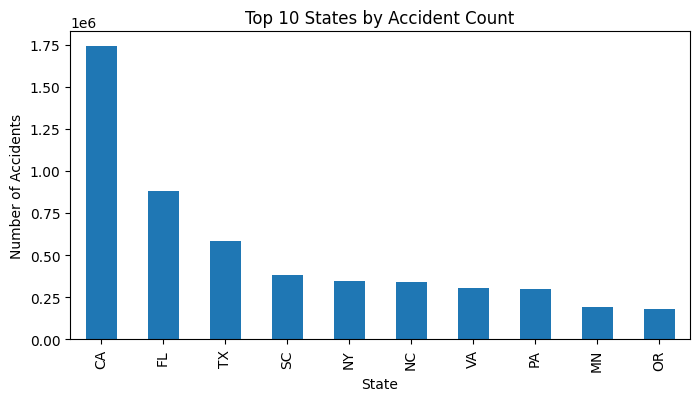

In [12]:
import matplotlib.pyplot as plt

top_states.plot(kind='bar',figsize=(8,4),title='Top 10 States by Accident Count')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

In [13]:
top_cities=df['City'].value_counts().head(10)
top_cities

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930


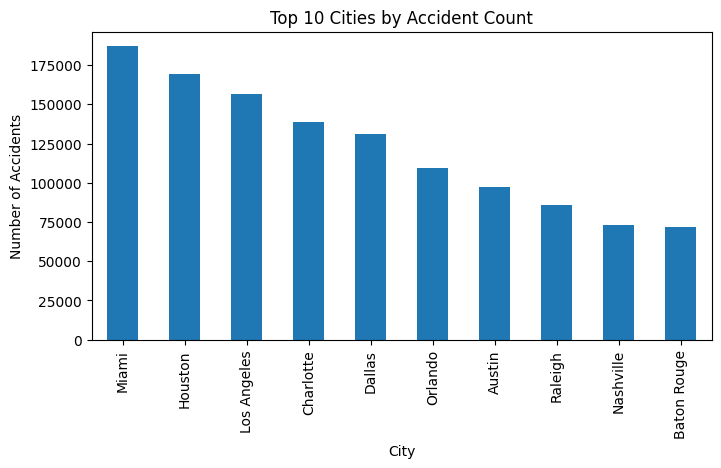

In [14]:
top_cities.plot(kind='bar',figsize=(8,4),title='Top 10 Cities by Accident Count')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.show()

In [15]:
state_summary=df.groupby('State').size().sort_values(ascending=False).head(5)
state_summary

,0
State,
CA,1741422
FL,880159
TX,582837
SC,382557
NY,347932


###Q2. Spatial Temporal patterns within a State


In [16]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Internship/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv')
df=df[['Start_Time','Start_Lat','Start_Lng','State']].dropna()

df['Start_Time']=pd.to_datetime(df['Start_Time'],errors='coerce')
state_df=df[df['State']=='CA']
print("Total accidents in CA: ",len(state_df))

Total accidents in CA:  1741433


#Hourly Distribution of Accidents in Bar Plot

/tmp/ipython-input-147568215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Hour']=state_df['Start_Time'].dt.hour


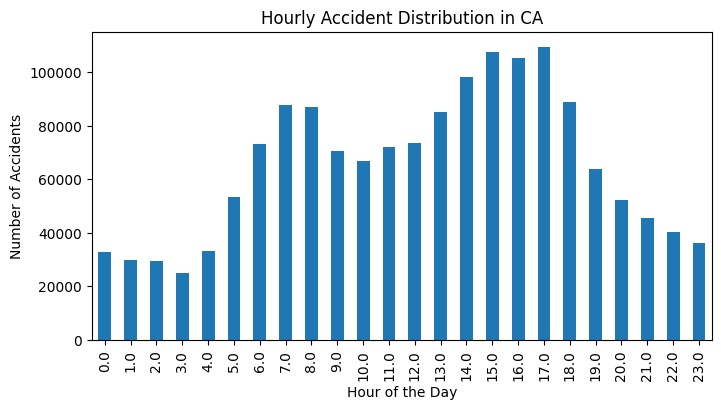

In [17]:
state_df['Hour']=state_df['Start_Time'].dt.hour
hourly_counts=state_df['Hour'].value_counts().sort_index()

hourly_counts.plot(kind='bar',figsize=(8,4),title='Hourly Accident Distribution in CA')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

#Monthly Distribution of Accidents in Bar Plot

/tmp/ipython-input-29539568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['Month'] = state_df['Start_Time'].dt.month


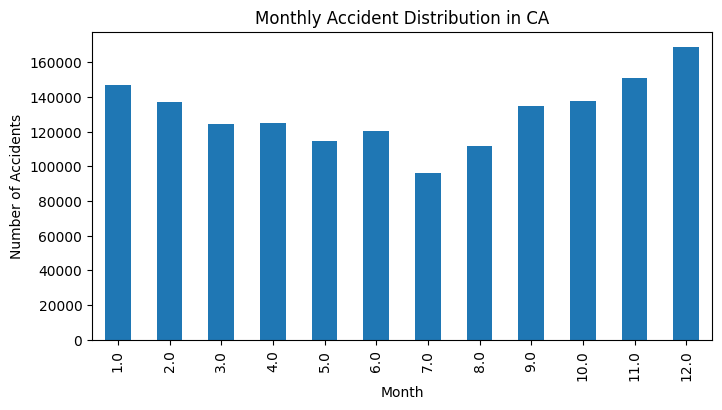

In [18]:
state_df['Month'] = state_df['Start_Time'].dt.month
monthly_counts = state_df['Month'].value_counts().sort_index()

monthly_counts.plot(kind='bar', figsize=(8,4), title="Monthly Accident Distribution in CA")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()


Peak Hour (8 AM)

In [19]:
peak_df=state_df[state_df['Hour']==8].sample(5000,random_state=1)
peak_map=folium.Map(location=[36.8,-119.4],zoom_start=6)
HeatMap(peak_df[['Start_Lat','Start_Lng']].values.tolist(),radius=8).add_to(peak_map)
peak_map

Off-peak hour (2AM)

In [20]:
offpeak_df = state_df[state_df['Hour'] == 2].sample(3000, random_state=1)

offpeak_map = folium.Map(location=[36.8, -119.4], zoom_start=6)
HeatMap(offpeak_df[['Start_Lat','Start_Lng']].values.tolist(), radius=5).add_to(offpeak_map)

offpeak_map


#Seasonal Comparison
In Winter

In [21]:
winter_df=state_df[state_df['Month'].isin([12,1,2])].sample(5000)

winter_map=folium.Map(location=[36.8,-119.4],zoom_start=5)
HeatMap(winter_df[['Start_Lat','Start_Lng']].values.tolist(),radius=7).add_to(winter_map)
winter_map

In Summer

In [24]:
summer_df = state_df[state_df['Month'].isin([6,7,8])].sample(5000)

summer_map = folium.Map(location=[36.8, -119.4], zoom_start=6)
HeatMap(summer_df[['Start_Lat','Start_Lng']].values.tolist(), radius=8).add_to(summer_map)

summer_map


###Q3.Geospatial Correlates of Severity

In [23]:
df=pd.read_csv('/content/drive/MyDrive/Internship/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv')
severity_map = folium.Map(location=[39.5, -98.35], zoom_start=5)

for sev in [1, 2, 3, 4]:
    data = df[df['Severity'] == sev].sample(8000, random_state=42)
    HeatMap(
        data[['Start_Lat', 'Start_Lng']].values.tolist(),
        name=f"Severity {sev}"
    ).add_to(severity_map)

folium.LayerControl().add_to(severity_map)
severity_map


##Severity Comparison:Urban vs Non-Urban

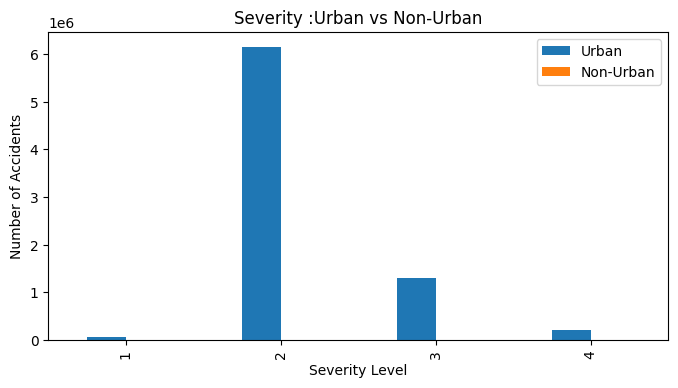

In [25]:
urban=df[df['City'].notna()]
non_urban=df[df['City'].isna()]

urban_sev=urban['Severity'].value_counts().sort_index()
nonurban_sev=non_urban['Severity'].value_counts().sort_index()

sev_df=pd.DataFrame({'Urban':urban_sev,'Non-Urban':nonurban_sev})
sev_df.plot(kind='bar',figsize=(8,4),title='Severity :Urban vs Non-Urban')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

#Severity vs Weather Condition

In [26]:
weather_sev=df.groupby(['Weather_Condition','Severity']).size().unstack().fillna(0)
weather_sev.head()

Severity,1,2,3,4
Weather_Condition,,,,
Blowing Dust,1.0,171.0,17.0,0.0
Blowing Dust / Windy,8.0,231.0,19.0,8.0
Blowing Sand,0.0,1.0,1.0,0.0
Blowing Snow,0.0,567.0,134.0,39.0
Blowing Snow / Windy,0.0,884.0,17.0,24.0


<function matplotlib.pyplot.show(close=None, block=None)>

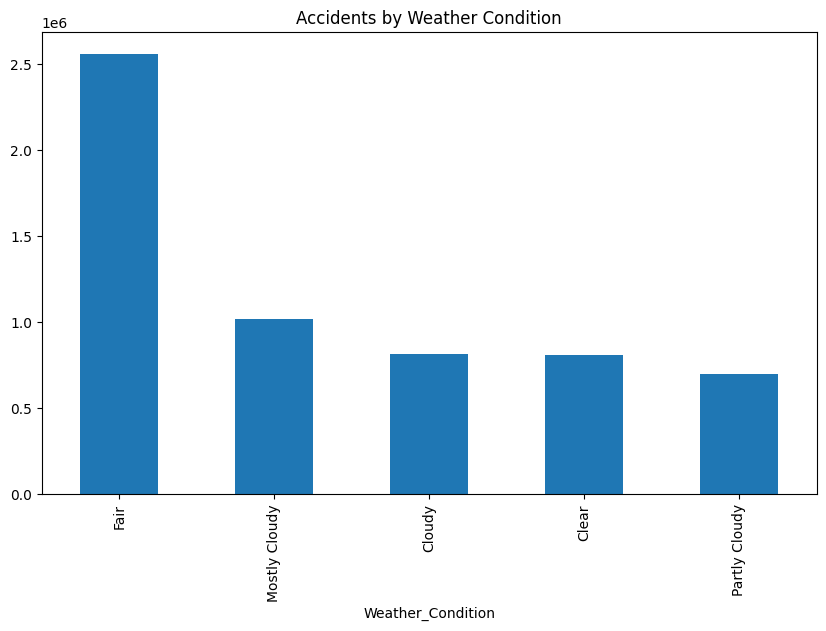

In [27]:
weather_sev.sum(axis=1).sort_values(ascending=False).head(5).plot(kind='bar',figsize=(10,6),title='Accidents by Weather Condition')
plt.show